Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.02) Sampling Rate and Aliasing

# <font color=red>Give it a Try!
# <font color=red>Part 1

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.02.G1) Sampling Rate</font>

### <font color=red>DSP.02.G1.a) Sampling Rate</font>

Plot a 40 Hz sine wave digitized at 200 Hz, using just the sampled points (with a duration of 1 second). Then plot it again, connecting those points (i.e., interpolating pixels between those points to show a waveform) to make a nice-looking plot.

Use the Python 'len' command to verify that the length of the digitized waveform is indeed 200
points.

Finally, calculate the sample period.

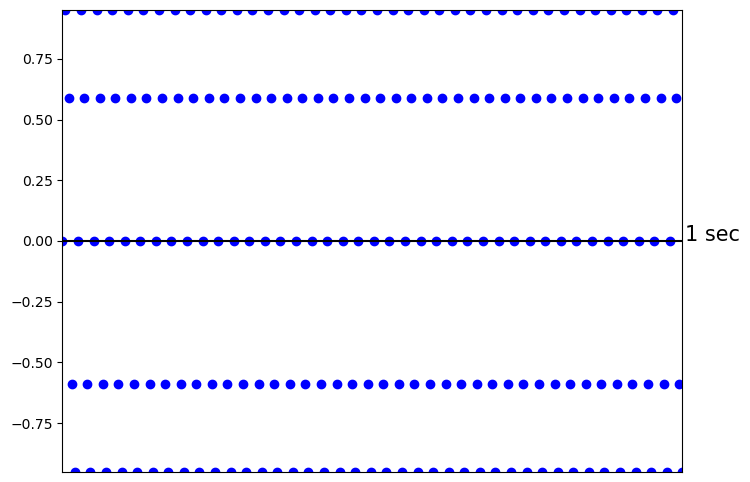

In [2]:
time = np.arange(0,1,0.005)
freq = 40
timeseries = np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries,'bo')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

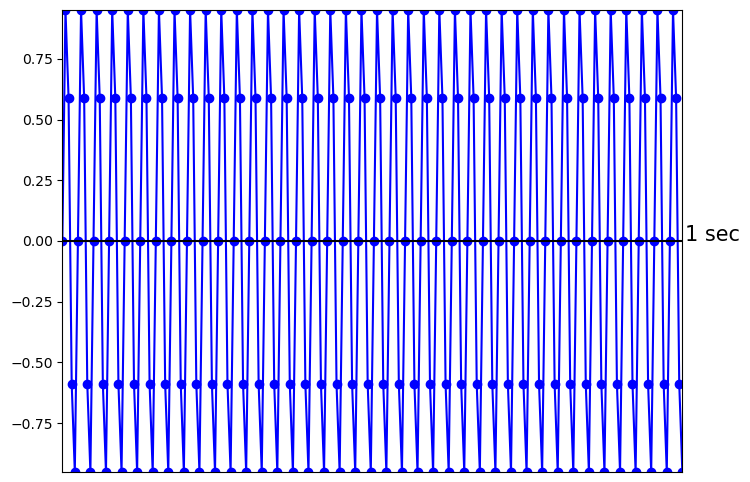

In [3]:
make_plot_1(time,timeseries,'bo-')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In [4]:
datalength = len(timeseries)
datalength

200

### <font color=red>DSP.02.G1.b) Sampling Rate</font>

Plot a 100 Hz sine wave digitized at 400 Hz. Use the 'make_plot' command to make a nice-looking
plot.

Use the Python 'len' command to verify that the length of the digitized waveform is indeed 400
points.

Finally, calculate the sample period.

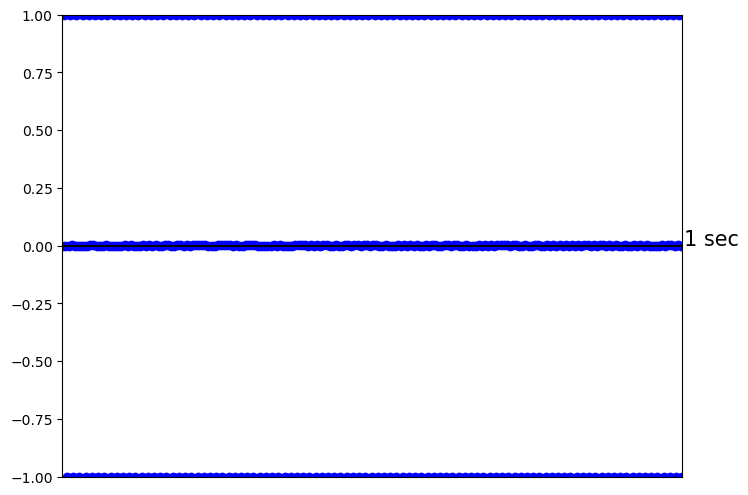

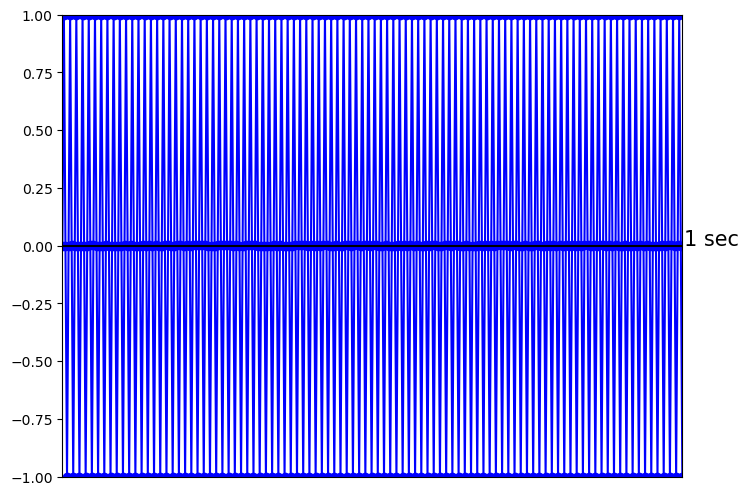

In [5]:
time = np.arange(0,1,1/400)
freq = 100
timeseries = np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries,'bo')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

make_plot_1(time,timeseries,'bo-')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In [6]:
datalength = len(timeseries)
datalength

400

### <font color=red>DSP.02.G1.c) Sampling Rate - The Nyquist-Shannon Theorem</font>

Apply the Nyquist sampling theorem.

-With a sampling frequency = 512 Hz, we can obtain reliable frequency information only for frequencies
less than ...?... Hz. (type answer in the blank)

-With a sampling frequency = 100,050 Hz, we can obtain reliable frequency information only for frequencies less than ...?... Hz. (type answer in the blank)

-With a sampling frequency = 14 Hz, we can obtain reliable frequency information only for frequencies
less than ...?... Hz. (type answer in the blank)

### <font color=red>DSP.02.G1.d) Sampling Rate - The Nyquist-Shannon Theorem</font>

Start with a 25 Hz wave digitized at 100 Hz.

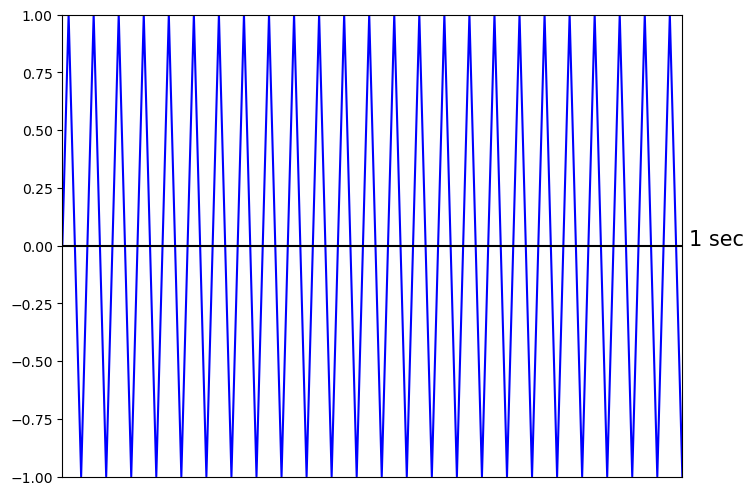

In [7]:
time = np.arange(0,1,1/100)
freq = 25
timeseries = np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We digitized at 100 Hz. Has the Nyquist Sampling Theorem been violated? If the Nyquist Sampling
Theorem has been violated, what frequency has been aliased into the new time series?
Ans: No, the Nyquist Theorem has not been violated. Frequencies above 50 Hz would be aliased, but we're at 25 Hz.

### <font color=red>DSP.02.G1.e) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the same 25 Hz wave digitized at 100 Hz, but now the amplitude is increased by a gain of 5.

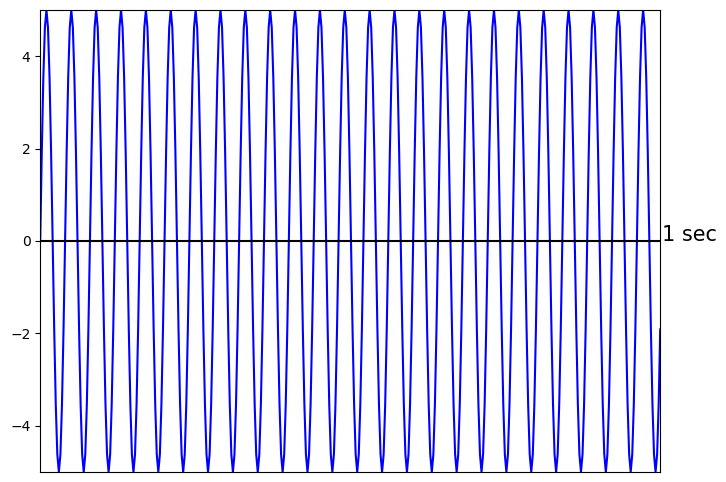

In [8]:
time = np.arange(0,1,1/400)
freq = 25
timeseries = 5 * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We digitized at 100 Hz and increased the gain by 5. Has the Nyquist Sampling Theorem been violated? If
the Nyquist Sampling Theorem has been violated, what frequency has been aliased into the new time
series? ______ Hz. (type answer in the blank)

### <font color=red>DSP.02.G1.f) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the same 25 Hz wave now digitized at 75 Hz.

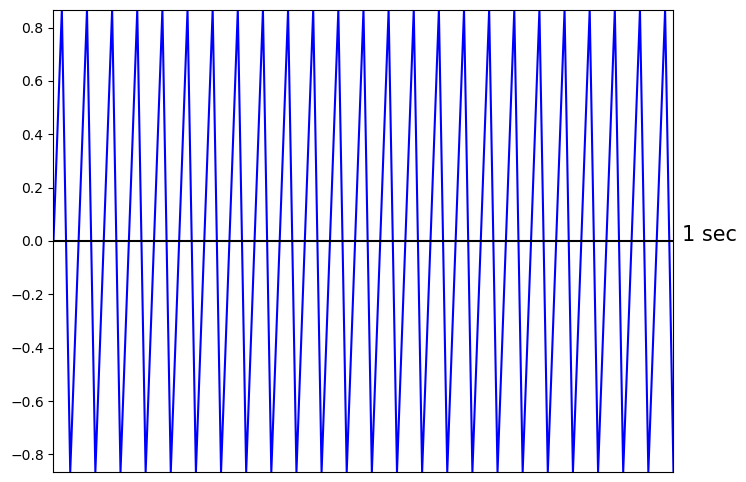

In [9]:
time = np.arange(0,1,1/75)
freq = 25
timeseries = np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We digitized at 75 Hz. Has the Nyquist Sampling Theorem been violated? If the Nyquist Sampling Theorem has been violated, what frequency has been aliased into the new time series? ______ Hz. (type answer in the blank)

### <font color=red>DSP.02.G1.g) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the same 25 Hz wave digitized at 75 Hz and now with a 90 degree phase offset.

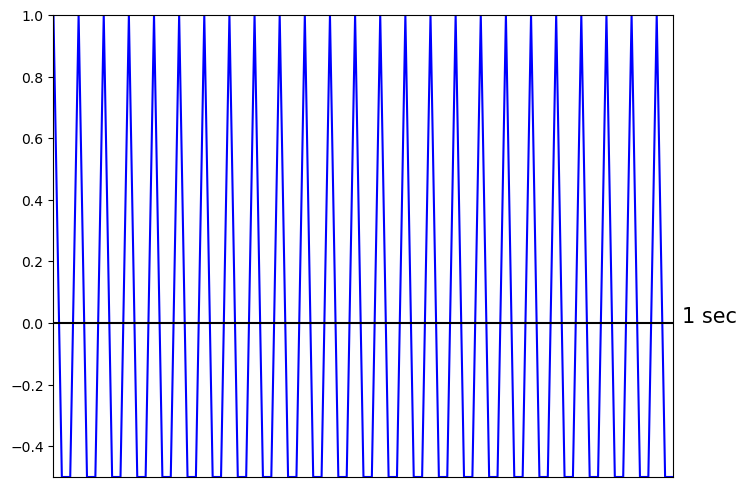

In [10]:
time = np.arange(0,1,1/75)
freq = 25
timeseries = np.sin(2*np.pi * freq * time + np.pi/2)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We introduced a 90 degree phase offset and then digitized at 75 Hz. Can you see how the phase offset has changed the plot? Has the Nyquist Sampling Theorem
been violated? If the Nyquist Sampling Theorem has been violated, what frequency has been aliased
into the new time series? ______ Hz. (type answer in the blank)

### <font color=red>DSP.02.G1.h) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the same 25 Hz wave digitized at 30 Hz and now with a 180 degree phase offset.

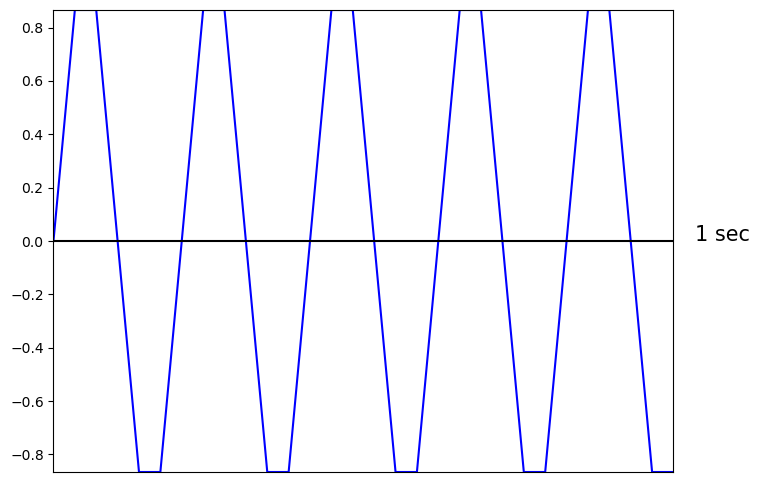

In [11]:
time = np.arange(0,1,1/30)
freq = 25
timeseries = np.sin(2*np.pi * freq * time + np.pi)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We introduced a 180 degree phase offset and then digitized at 30 Hz. Has the Nyquist Sampling Theorem
been violated? If the Nyquist Sampling Theorem has been violated, what frequency has been
aliased into the new time series? ______ Hz. (type answer in the blank)

### <font color=red>DSP.02.G1.i) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the same 25 Hz wave digitized at 20 Hz.

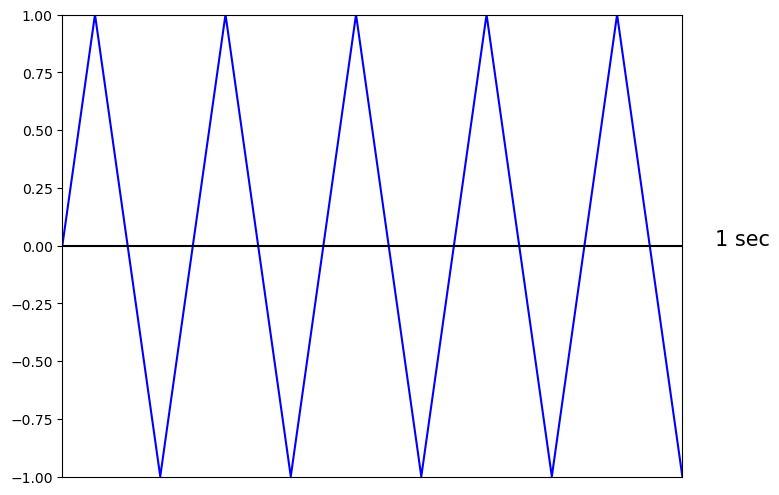

In [12]:
time = np.arange(0,1,1/20)
freq = 25
timeseries = np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We digitized at 20 Hz. Has the Nyquist Sampling Theorem been violated? If the Nyquist Sampling
Theorem has been violated, what frequency has been aliased into the new time series? ______ Hz. (type answer in the blank)

### <font color=red>DSP.02.G1.j) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the sum of 25 Hz and 30 Hz sine waves digitized at 40 Hz.

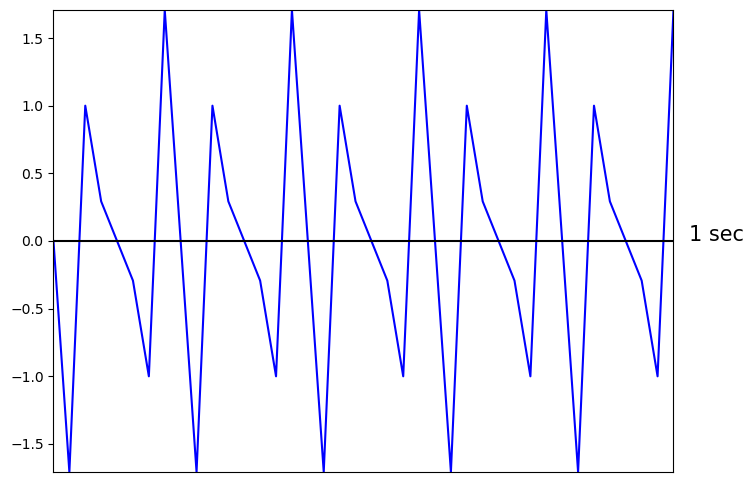

In [13]:
time = np.arange(0,1,1/40)
freq1 = 25
freq2 = 30
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We added 25 Hz and 30 Hz sine waves and then digitized at 40 Hz. Has the Nyquist Sampling Theorem
been violated? If the Nyquist Sampling Theorem has been violated, what frequency has been aliased
into the new time series? ______ Hz. (type answer in the blank)

Hint: You might want to calculate the power spectrum of your sample and then comment.

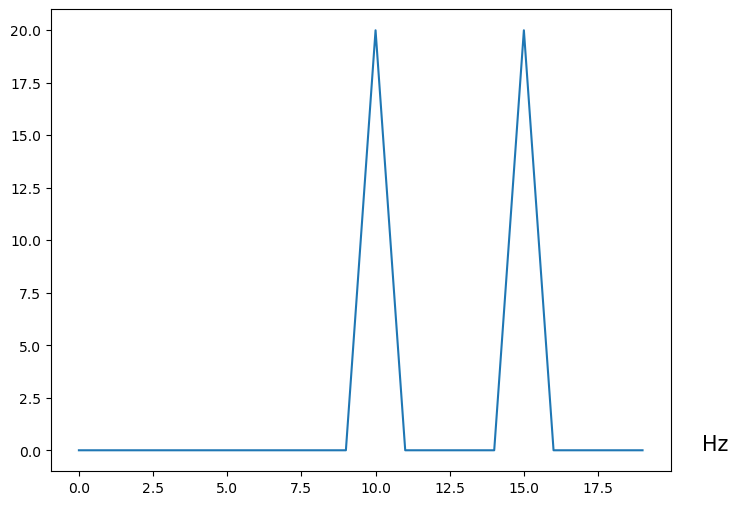

In [14]:
make_plot_freq_1(timeseries,40)

# Adding text to the figure
plt.text(21,0,'Hz',fontsize=15)
plt.show()

### <font color=red>DSP.02.G1.k) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the sum of 100 Hz and 50 Hz sine waves digitized at 160 Hz.

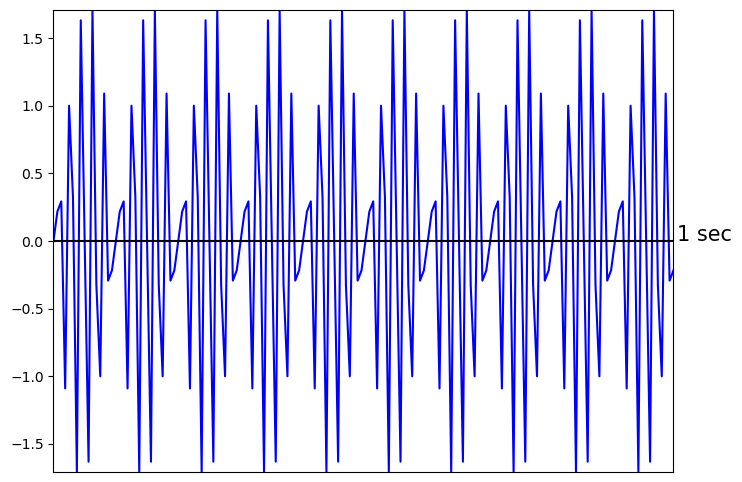

In [15]:
time = np.arange(0,1,1/160)
freq1 = 100
freq2 = 50
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We added 100 Hz and 50 Hz sine waves and then digitized at 160 Hz. Has the Nyquist Sampling Theorem
been violated? If the Nyquist Sampling Theorem has been violated, what frequency has been
aliased into the new time series? ______ Hz. (type answer in the blank)

Hint: You might want to calculate the power spectrum and then comment.

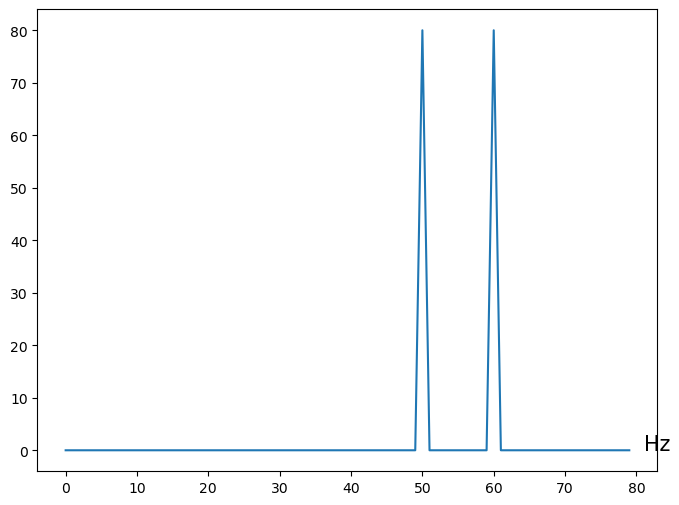

In [16]:
make_plot_freq_1(timeseries,160)

# Adding text to the figure
plt.text(81,0,'Hz',fontsize=15)
plt.show()

### <font color=red>DSP.02.G1.l) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the sum of 25 Hz wave and 30 Hz sine waves, digitized at 54 Hz.

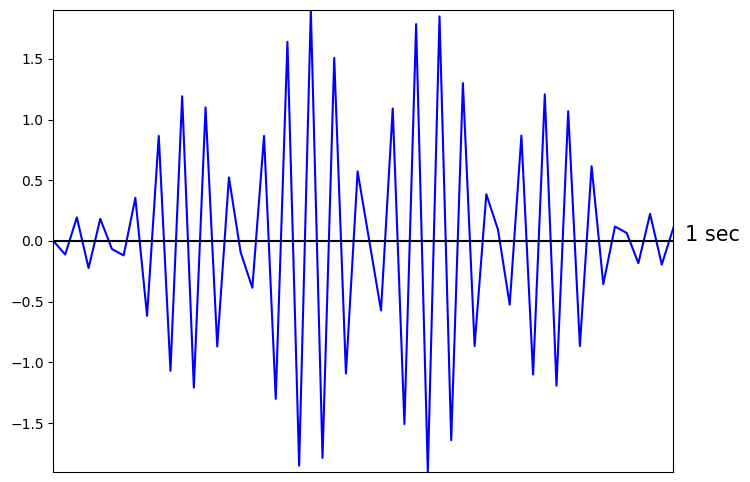

In [17]:
time = np.arange(0,1,1/54)
freq1 = 25
freq2 = 30
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

We added 25 Hz and 30 Hz sine waves and then digitized at 54 Hz. Has the Nyquist Sampling Theorem
been violated? If the Nyquist Sampling Theorem has been violated, what frequency has been aliased
into the new time series? ______ Hz. (type answer in the blank)

Hint: You might want to calculate the power spectrum and then comment.

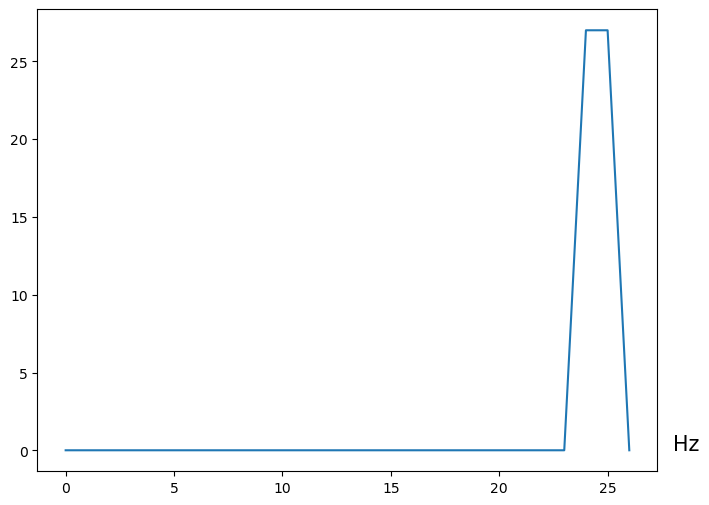

In [18]:
make_plot_freq_1(timeseries,54)

# Adding text to the figure
plt.text(28,0,'Hz',fontsize=15)
plt.show()

### <font color=red>DSP.02.G1.m) Sampling Rate - The Nyquist-Shannon Theorem</font>

Here is the sum of 25 Hz wave and 29 Hz sine waves, digitized at 54 Hz.

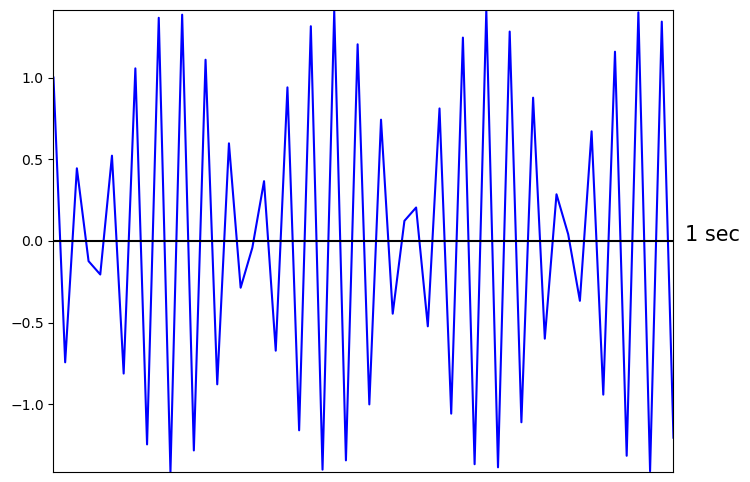

In [19]:
time = np.arange(0,1,1/54)
freq1 = 25
freq2 = 29
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time + np.pi/2)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Show the power spectrum.

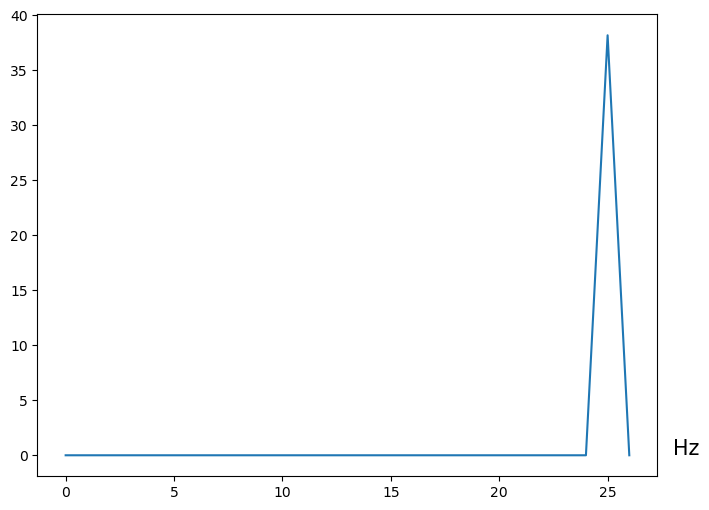

In [20]:
make_plot_freq_1(timeseries,54)

# Adding text to the figure
plt.text(28,0,'Hz',fontsize=15)
plt.show()

Comment on why the timeseries has two frequencies, but the power spectrum plot shows only one
peak.